### Develop a program to apply K-means algorithm to cluster a set of data stored in .CSV file. Use the same data set for clustering using EM algorithm. Compare the results of these two algorithms and comment on the quality of clustering.

In [1]:
# Run this file to generate data.csv file not important for solution
import pandas as pd
from sklearn import datasets

# Load the Iris dataset
iris = datasets.load_iris()
data = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Save the dataset to a CSV file
data.to_csv('data.csv', index=False)

C:\Users\dheer\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


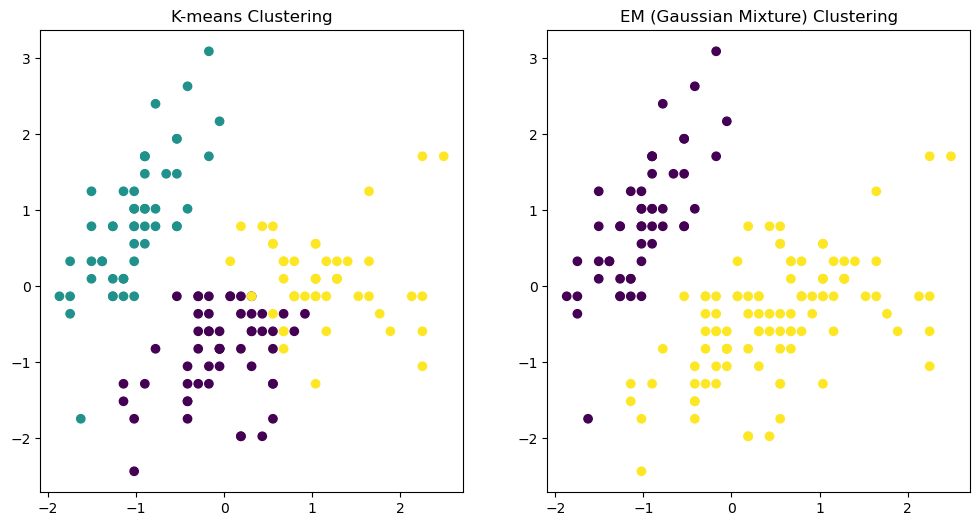

K-means - Silhouette Score: 0.45994823920518646
EM (Gaussian Mixture) - Silhouette Score: 0.5817500491982808
K-means - Davies-Bouldin Index: 0.8335949464754334
EM (Gaussian Mixture) - Davies-Bouldin Index: 0.5933126905762434


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score

data = pd.read_csv('data.csv')

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)
data_array = data_scaled

kmeans = KMeans(n_clusters=3, random_state=0)
kmeans_clusters = kmeans.fit_predict(data_array)

gmm = GaussianMixture(n_components=2, random_state=0)
gmm_clusters = gmm.fit(data_array).predict(data_array)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(data_array[:, 0], data_array[:, 1], c=kmeans_clusters, cmap='viridis')
plt.title('K-means Clustering')
plt.subplot(1, 2, 2)
plt.scatter(data_array[:, 0], data_array[:, 1], c=gmm_clusters, cmap='viridis')
plt.title('EM (Gaussian Mixture) Clustering')
plt.show()

kmeans_silhouette = silhouette_score(data_array, kmeans_clusters)
kmeans_db = davies_bouldin_score(data_array, kmeans_clusters)

gmm_silhouette = silhouette_score(data_array, gmm_clusters)
gmm_db = davies_bouldin_score(data_array, gmm_clusters)

print("K-means - Silhouette Score:", kmeans_silhouette)
print("EM (Gaussian Mixture) - Silhouette Score:", gmm_silhouette)
print("K-means - Davies-Bouldin Index:", kmeans_db)
print("EM (Gaussian Mixture) - Davies-Bouldin Index:", gmm_db)